In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re
import warnings

%matplotlib inline

# 한글 설정
import matplotlib.font_manager as fm

warnings.filterwarnings(action='ignore')

font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

In [4]:
data = pd.read_csv("data/naver_books.csv")
data.head(2)

,title,link,image,author,price,discount,publisher,pubdate,isbn,description
0,"<b>82년생 김지영</b> (오늘의 젊은 작가 13,조남주 장편소설)",http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/112/...,조남주,13000,11700.0,민음사,20161014,8937473135 9788937473135,"공포, 피로, 당황, 놀람, 혼란, 좌절의 연속에 대한 한국 여자의 인생 현장 보고..."
1,<b>나미야 잡화점의 기적</b> (땡큐 에디션),http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/071/...,히가시노 게이고,14800,13320.0,현대문학,20121219,8972756199 9788972756194,기적과 감동을 추리한다!&#x0D;히가시노 게이고의 차기 대표작으로 손꼽힐 &#x0...


### 1. 분포 확인

#### 1) 결측치 확인

In [5]:
data.isna().sum()

title           0
link            0
image           1
author          0
price           0
discount       34
publisher       0
pubdate         0
isbn            0
description     4
dtype: int64

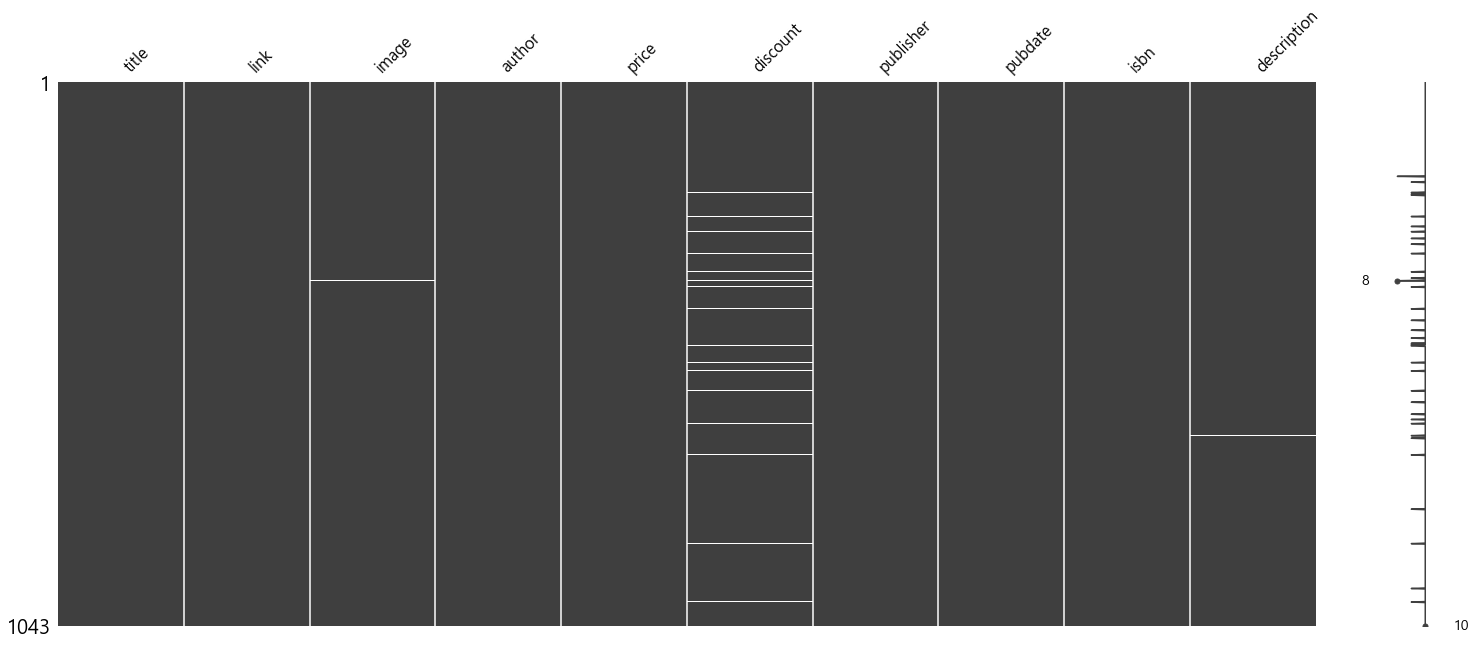

In [280]:
msno.matrix(data)
plt.show()

- 줄거리 중 결측치가 있는 책 정보가 존재 → 줄거리는 가장 중요한 요소이기 때문에 없으면 제거하여 대상에서 제외
- 그 외 할인가격, 이미지 정보는 결측치가 있어도 영향X → 무시하고 진행

In [281]:
# 줄거리 전처리 - 결측값 제거, 특수 문자 제거
data = data.dropna(subset=['description']).reset_index(drop=True)

data['description'] = data['description'].apply(lambda x: re.sub('[&#x0D;]',' ', x))
data['description'] = data['description'].apply(lambda x: re.sub('[-=+#/\:^@*\"※~ㆍ『』‘|\(\)\[\]▶`\'…《》\”\“\’·<b></b>「」]','', x))

data.tail(3)

,title,link,image,author,price,discount,publisher,pubdate,isbn,description
1036,<b>읽으면서 바로 써먹는 어린이</b> 시리즈 세트,http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/223/...,한날,180000,162000.0,파란정원,20220404,1158682328 9791158682323,"귀엽고 깜찍한 찹이와 친구들의 이야기로, 웹툰이라는 형식에 담아 부담 없이 자꾸 손..."
1037,<b>죄의 궤적</b> 2,http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/205/...,오쿠다 히데오,14500,13050.0,은행나무,20210514,1191071022 9791191071023,죄의 궤적으로 돌아왔다. 나오키상 수상작 공중그네의 닥터 이라부 시리즈로 유쾌한 풍...
1038,<b>지적 대화를 위한 넓고 얕은 지식</b> 1,http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/162/...,채사장,16000,14400.0,웨일북(whalebooks),20200205,1190313189 9791190313186,이 모든 것이 지적 대화를 위한 넓고 얕은 지식에 대한 설명이다. ...


In [282]:
# title, subtitle  분리
data['subtitle'] = data['title'].apply(lambda x: re.split(r'<b>([^)]*)</b>', x))

data['title'] = data['subtitle'].apply(lambda x: x[0] if len(x) == 1 else x[1])
data['subtitle'] = data['subtitle'].apply(lambda x: np.nan if len(x) == 1 else x[2].strip())

In [300]:
# 시리즈 책은 몇권인지 제목에 표시
data['title'] = data[['title', 'subtitle']].apply(lambda x: x['title']+x['subtitle']
                                                if (pd.notna(x['subtitle']) and x['subtitle'].isdigit())
                                                else x['title'], axis=1)

In [301]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        1039 non-null   object 
 1   link         1039 non-null   object 
 2   image        1038 non-null   object 
 3   author       1039 non-null   object 
 4   price        1039 non-null   int64  
 5   discount     1006 non-null   float64
 6   publisher    1039 non-null   object 
 7   pubdate      1039 non-null   int64  
 8   isbn         1039 non-null   object 
 9   description  1039 non-null   object 
 10  subtitle     1037 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 89.4+ KB


#### 2) 가격 분포

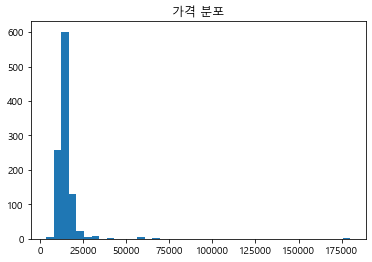

In [302]:
data['price'].hist(bins=40, grid=False)

plt.title("가격 분포")
plt.show()

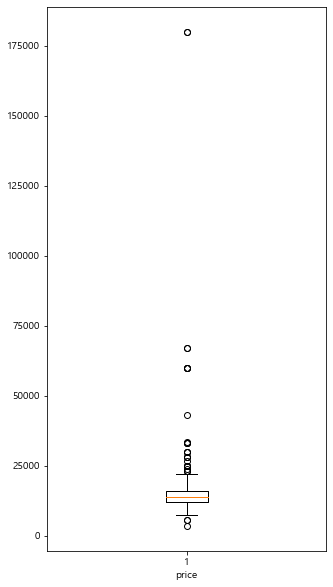

In [303]:
plt.figure(figsize=(5, 10))
plt.boxplot(data['price'])
plt.xlabel('price')
plt.show()

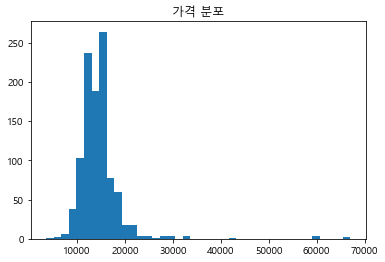

In [304]:
data.loc[data['price']<max(data['price']), 'price'].hist(bins=40, grid=False)

plt.title("가격 분포")
plt.show()

In [305]:
data.loc[data['price']==max(data['price'])]

,title,link,image,author,price,discount,publisher,pubdate,isbn,description,subtitle
635,읽으면서 바로 써먹는 어린이,http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/223/...,한날,180000,162000.0,파란정원,20220404,1158682328 9791158682323,"아이들이 좋아하는 귀엽고 깜찍한 찹이와 친구들의 이야기로, 웹툰이라는 형식에 담아 ...",시리즈 세트
1036,읽으면서 바로 써먹는 어린이,http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/223/...,한날,180000,162000.0,파란정원,20220404,1158682328 9791158682323,"귀엽고 깜찍한 찹이와 친구들의 이야기로, 웹툰이라는 형식에 담아 부담 없이 자꾸 손...",시리즈 세트


- 책들의 가격 정보를 분포화하였을 때, 대부분 5만원 이내에서 판매되고 있으나 극단적인 값이 존재하여 별도 확인
- 확인한 결과, 시리즈 도서를 묶은 것으로 제거하여 진행

In [306]:
# 시리즈 책 제거
data_na = data.loc[data['price']<max(data['price'])]
data_na = data_na.drop_duplicates(subset=['title', 'author', 'price', 'pubdate'], ignore_index=True)
data_na.head()

,title,link,image,author,price,discount,publisher,pubdate,isbn,description,subtitle
0,82년생 김지영,http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/112/...,조남주,13000,11700.0,민음사,20161014,8937473135 9788937473135,"공포, 피로, 당황, 놀람, 혼란, 좌절의 연속에 대한 한국 여자의 인생 현장 보고...","(오늘의 젊은 작가 13,조남주 장편소설)"
1,나미야 잡화점의 기적,http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/071/...,히가시노 게이고,14800,13320.0,현대문학,20121219,8972756199 9788972756194,기적과 감동을 추리한다! 히가시노 게이고의 차기 대표작으로 손꼽힐 ...,(땡큐 에디션)
2,언어의 온도,http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/109/...,이기주,13800,12420.0,말글터,20160819,1195522126 9791195522125,언어의 온도17 만부 기념 에디션 은 온라인 혹은 일부매장에서 구매 가능하십니다....,"(170만부 기념 에디션, 말과 글에는 그리고 삶에는 나름의 따뜻함과 차가움이 있다)"
3,돌이킬 수 없는 약속,http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/116/...,야쿠마루 가쿠,15000,13500.0,북플라자,20170202,8998274795 9788998274795,"응징과 용서의 진정한 의미는 무엇인가!주인공이 과거에 저지른 죄, 그리고 15년 전...",
4,아몬드,http://book.naver.com/bookdb/book_detail.php?b...,https://bookthumb-phinf.pstatic.net/cover/118/...,손원평,12000,10800.0,창비,20170331,8936434268 9788936434267,괴물인 내가 또 다른 괴물을 만났다!영화와도 같은 강렬한 사건과 매혹적인 문체로 시...,"(손원평 장편소설,제10회 창비 청소년문학상 수상작)"


#### 3) 출판연도 분포

In [309]:
data_na['pubyear'] = data_na['pubdate'].apply(lambda x:int(str(x)[:4]))

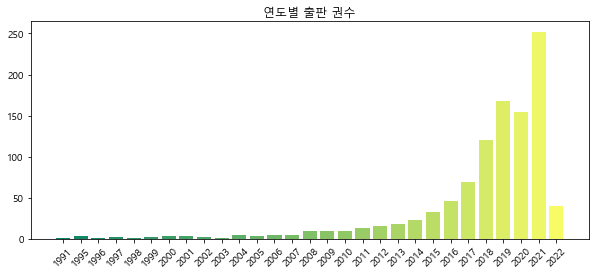

In [317]:
year_cnt = data_na["pubyear"].value_counts().sort_values(key=lambda x: x.index)

fig = plt.figure(figsize=(10,4)) # Figure 생성 
# fig.set_facecolor('white') # Figure 배경색 지정
ax1 = fig.add_subplot() # axes 생성

xtick_label_position = list(range(len(year_cnt))) # x축 눈금 라벨이 표시될 x좌표
ax1.set_xticks(xtick_label_position) # x축 눈금 
ax1.set_xticklabels(year_cnt.index, rotation = 45) # x축 눈금 라벨

colors = sns.color_palette('summer', len(year_cnt)) # 바 차트 색상
ax1.bar(xtick_label_position, year_cnt.values, color=colors) # 바차트 출력

plt.title("연도별 출판 권수")
plt.show()

- 2018년도 이후로 출판된 책이 많아졌으며 2021년 가장 많은 책 정보를 보유하고 있다.

### 2. 줄거리 내용

In [6]:
from wordcloud import WordCloud
from konlpy.tag import Okt
from PIL import Image
from collections import Counter

font_path = "data/D2Coding.ttf"
book_mask = np.array(Image.open("data/book_logo.png"))

file = open("data/kor_stopwords.txt", 'r', encoding='UTF-8')
stopwords = file.read()
stopwords = stopwords.split()
stopwords[:10]

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']

In [337]:
# 모든 장르 정보 수집
story = ' '.join(list(data_na['description']))

#### 1) 명사/형용사/동사 워드클라우드

In [340]:
okt = Okt()

# 단어 분리
story_noun = [word for word, tg in okt.pos(story) if tg == "Noun" and word not in stopwords]
story_adj = [word for word, tg in okt.pos(story) if tg == "Adjective" and word not in stopwords]
story_verb = [word for word, tg in okt.pos(story) if tg == "Verb" and word not in stopwords]

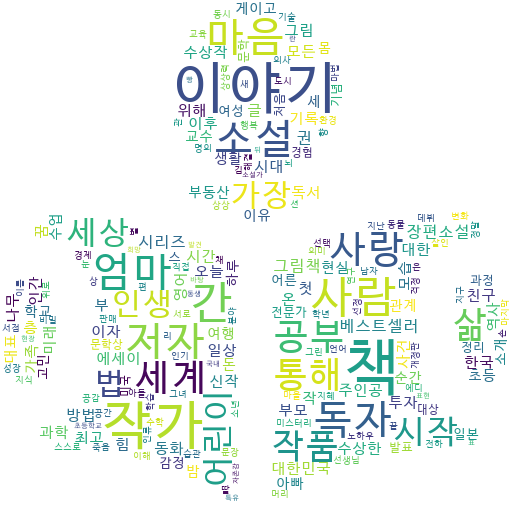

In [341]:
## 명사
n_counter = Counter(story_noun)

wc = WordCloud(background_color="white", max_font_size=60, 
                font_path = font_path, mask=book_mask)
wc.generate_from_frequencies(n_counter)
wc.to_image()

- 엄마, 인생, 법, 사랑, 공부 등과 같이 다양한 장르의 책 정보가 있음을 파악할 수 있다.

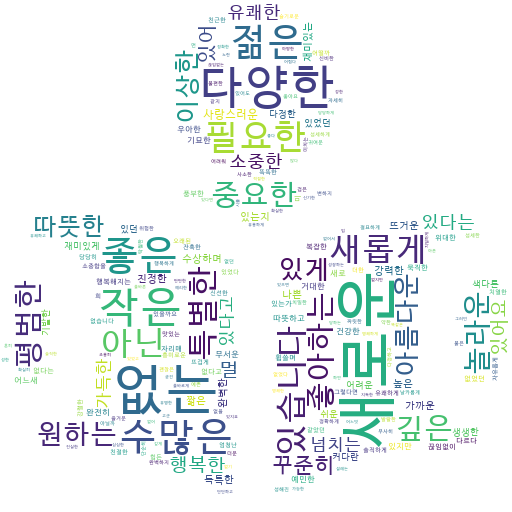

In [342]:
## 형용사
a_counter = Counter(story_adj)

wc = WordCloud(background_color="white", max_font_size=60, 
                font_path = font_path, mask=book_mask)
wc.generate_from_frequencies(a_counter)
wc.to_image()

- 새로운, 새롭게, 다양한과 같은 키워드로 보아 줄거리 내에서 작가의 출판 소식을 알리거나 작가가 기존 방향과는 색다른 방향의 도서를 출판했을 것으로 파악된다.
- 또한, 놀라운, 특별한, 평범한과 같이 다양한 표현형식이 존재하고 있어 명사와 마찬가지로 데이터 내 하나에 치우치지 않고 여러 스토리가 있는 것으로 파악된다.

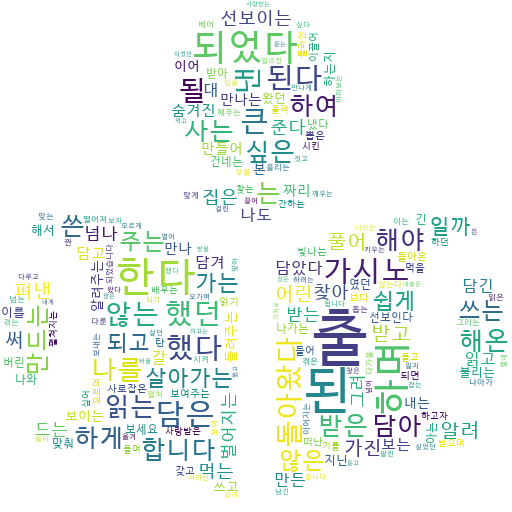

In [343]:
## 동사
v_counter = Counter(story_verb)

wc = WordCloud(background_color="white", max_font_size=60, 
                font_path = font_path, mask=book_mask)
wc.generate_from_frequencies(v_counter)
wc.to_image()

#### 2) 연도별 주제 트랜드

**2021**

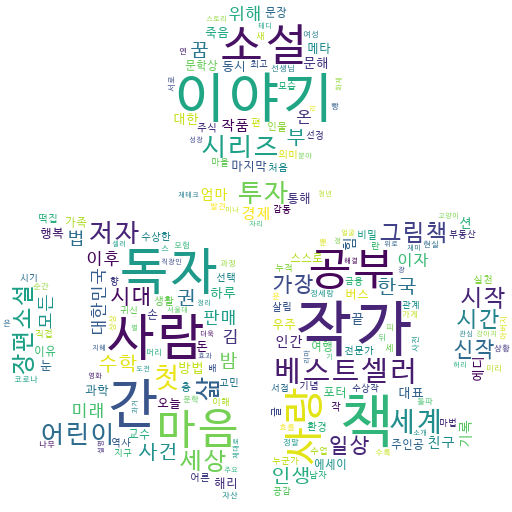

In [346]:
## 줄거리 수집
story_2021 = ' '.join(list(data_na.loc[data_na['pubyear'] == 2021, 'description']))

## 단어 분리
word_2021 = [word for word, tg in okt.pos(story_2021) if tg == "Noun" and word not in stopwords]

## 명사
counter_2021 = Counter(word_2021)

wc = WordCloud(background_color="white", max_font_size=60, 
                font_path = font_path, mask=book_mask)
wc.generate_from_frequencies(counter_2021)
wc.to_image()

- 가장 많은 데이터를 갖고 있는 2021년에는 사랑, 투자와 같은 주제가 인기있다.

**2020**

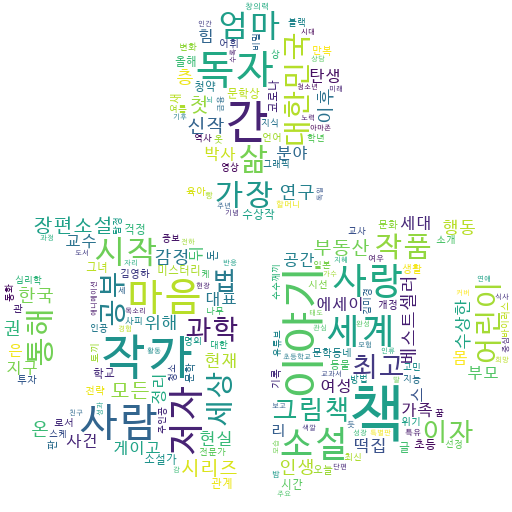

In [347]:
## 줄거리 수집
story_2020 = ' '.join(list(data_na.loc[data_na['pubyear'] == 2020, 'description']))

## 단어 분리
word_2020 = [word for word, tg in okt.pos(story_2020) if tg == "Noun" and word not in stopwords]

## 명사
counter_2020 = Counter(word_2020)

wc = WordCloud(background_color="white", max_font_size=60, 
                font_path = font_path, mask=book_mask)
wc.generate_from_frequencies(counter_2020)
wc.to_image()

- 2020년에는 엄마, 마음, 어린이, 사랑과 같은 키워드로 보아 가족관계를 바탕으로 한 도서가 많은 것으로 파악된다.

**2019**

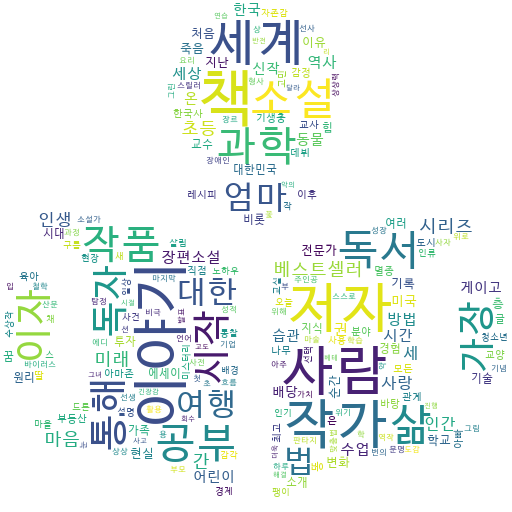

In [348]:
## 줄거리 수집
story_2019 = ' '.join(list(data_na.loc[data_na['pubyear'] == 2019, 'description']))

## 단어 분리
word_2019 = [word for word, tg in okt.pos(story_2019) if tg == "Noun" and word not in stopwords]

## 명사
counter_2019 = Counter(word_2019)

wc = WordCloud(background_color="white", max_font_size=60, 
                font_path = font_path, mask=book_mask)
wc.generate_from_frequencies(counter_2019)
wc.to_image()

- 2019년에는 세계, 법, 시작, 여행, 공부와 같은 키워드로 보아 자기관리에 대한 도서가 많았을 것으로 파악된다.

In [351]:
data_na.to_csv("data/book_datasets.csv", index=False)

### 3. LDA 토픽 모델링

In [ ]:
# !pip install gensim

In [359]:
from gensim import corpora 
from gensim import models

stopwords+=['lt', 'gt', '1', '2']

In [378]:
documents=list(data_na['description'])

texts = [[word for word in document.split() if word not in stopwords]
        for document in documents]

dictionary = corpora.Dictionary(texts)                    # 사전 생성 (토큰화)
print(dictionary)

corpus = [dictionary.doc2bow(text) for text in texts]     # 말뭉치 생성 (벡터화)

Dictionary(19344 unique tokens: ['82년생', '갈', '공감대', '공포,', '기치로']...)


In [379]:
# LDA 모델링
lda = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, 
        num_topics=4, random_state = 1)

# 주제마다 출현 확률이 높은 단어 순으로 출력
for t in lda.show_topics():
    print(t)

(0, '0.002*"새로운" + 0.002*"통해" + 0.002*"이야기를" + 0.002*"위해" + 0.002*"있다." + 0.002*"위한" + 0.001*"번째" + 0.001*"가장" + 0.001*"작가의" + 0.001*"출간되었다."')
(1, '0.002*"작가" + 0.002*"가장" + 0.002*"장편소설" + 0.002*"번째" + 0.002*"모든" + 0.002*"위한" + 0.002*"첫" + 0.001*"작가의" + 0.001*"통해" + 0.001*"없는"')
(2, '0.002*"통해" + 0.002*"있다." + 0.002*"첫" + 0.002*"가장" + 0.002*"대한" + 0.001*"작가" + 0.001*"위한" + 0.001*"우리가" + 0.001*"소설" + 0.001*"이야기를"')
(3, '0.003*"있다." + 0.002*"책" + 0.002*"새로운" + 0.002*"나무" + 0.002*"통해" + 0.002*"대한" + 0.001*"가장" + 0.001*"베스트셀러" + 0.001*"책은" + 0.001*"모든"')


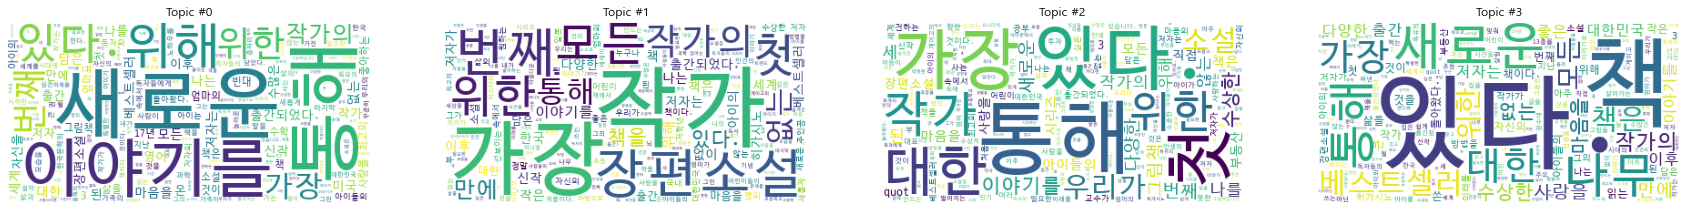

In [380]:
wc = WordCloud(background_color='white', font_path=font_path)            

plt.figure(figsize=(30,30))
for t in range(lda.num_topics):
    plt.subplot(5,4,t+1)
    x = dict(lda.show_topic(t,200))
    im = wc.generate_from_frequencies(x)
    plt.imshow(im)
    plt.axis("off")
    plt.title("Topic #" + str(t))

- 대부분 줄거리에 작가 소개가 들어가 있는 것으로 보이고 뚜렷한 토픽은 보이지 않는다.

### 4. 네트워크 분석

In [16]:
# !pip install networkx apyori

In [8]:
import networkx as nx

In [24]:
story_sets = []
story = list(data_na['description'])
for i in range(len(story)):
    nWord = [word for word in okt.nouns(story[i]) if word not in stopwords]
    story_sets.append(nWord)

In [50]:
## 연관규칙
from apyori import apriori

result = list(apriori(story_sets, min_support = 0.02))
ass_df = pd.DataFrame(result)
ass_df['length'] = ass_df['items'].apply(lambda x:len(x))
ass_df = ass_df[(ass_df['length'] == 2)&(ass_df['support']>=0.01)].sort_values(by='support',ascending=False)
ass_df.head()

,items,support,ordered_statistics,length
208,"(작가, 이야기)",0.051910,"[((), (작가, 이야기), 0.05190989226248776, 1.0), ((...",2
212,"(이야기, 책)",0.047992,"[((), (이야기, 책), 0.047992164544564155, 1.0), ((...",2
161,"(간, 작가)",0.047013,"[((), (간, 작가), 0.04701273261508325, 1.0), ((간)...",2
193,"(작가, 소설)",0.046033,"[((), (작가, 소설), 0.04603330068560235, 1.0), ((소...",2
221,"(저자, 책)",0.046033,"[((), (저자, 책), 0.04603330068560235, 1.0), ((저자...",2


In [51]:
# 네트워크 그래프 정의
G = nx.Graph()
ar = (ass_df['items']); G.add_edges_from(ar)

In [52]:
# 패이지랭크: 노드 순위, 색상, 크기 지정 유용
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize-min(nsize))/(max(nsize)-min(nsize))

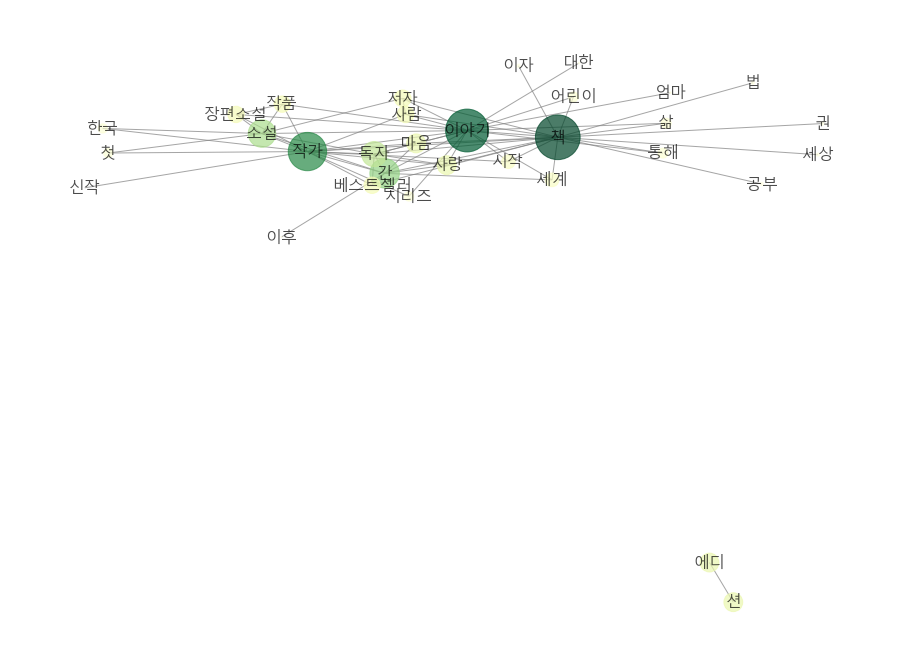

In [54]:
plt.figure(figsize = (16, 12))
plt.axis('off')
nx.draw_networkx(G, font_size = 16, font_family = font_name, node_color = list(pr.values()), 
                node_size = nsize, alpha = 0.7, edge_color = '.5', cmap = plt.cm.YlGn)
plt.show()

- 줄거리에는 작가, 이야기, 책이 가장 많이 출현
- 책과 어린이, 책과 세계의 간선 길이가 짧은 것으로 보아 어린이 대상의 도서와 세계를 주제로 한 책이 많을 것으로 추측된다.
- 이야기 단어와는 마음, 사랑, 시작, 사람과 연관성이 높은 것으로 보아 장르는 사랑과 관련된 소설이 많을 것으로 추측된다.